In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer#TEXT PROCESSING
import missingno as mns# CHECKING FOR MISSING
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\URIM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

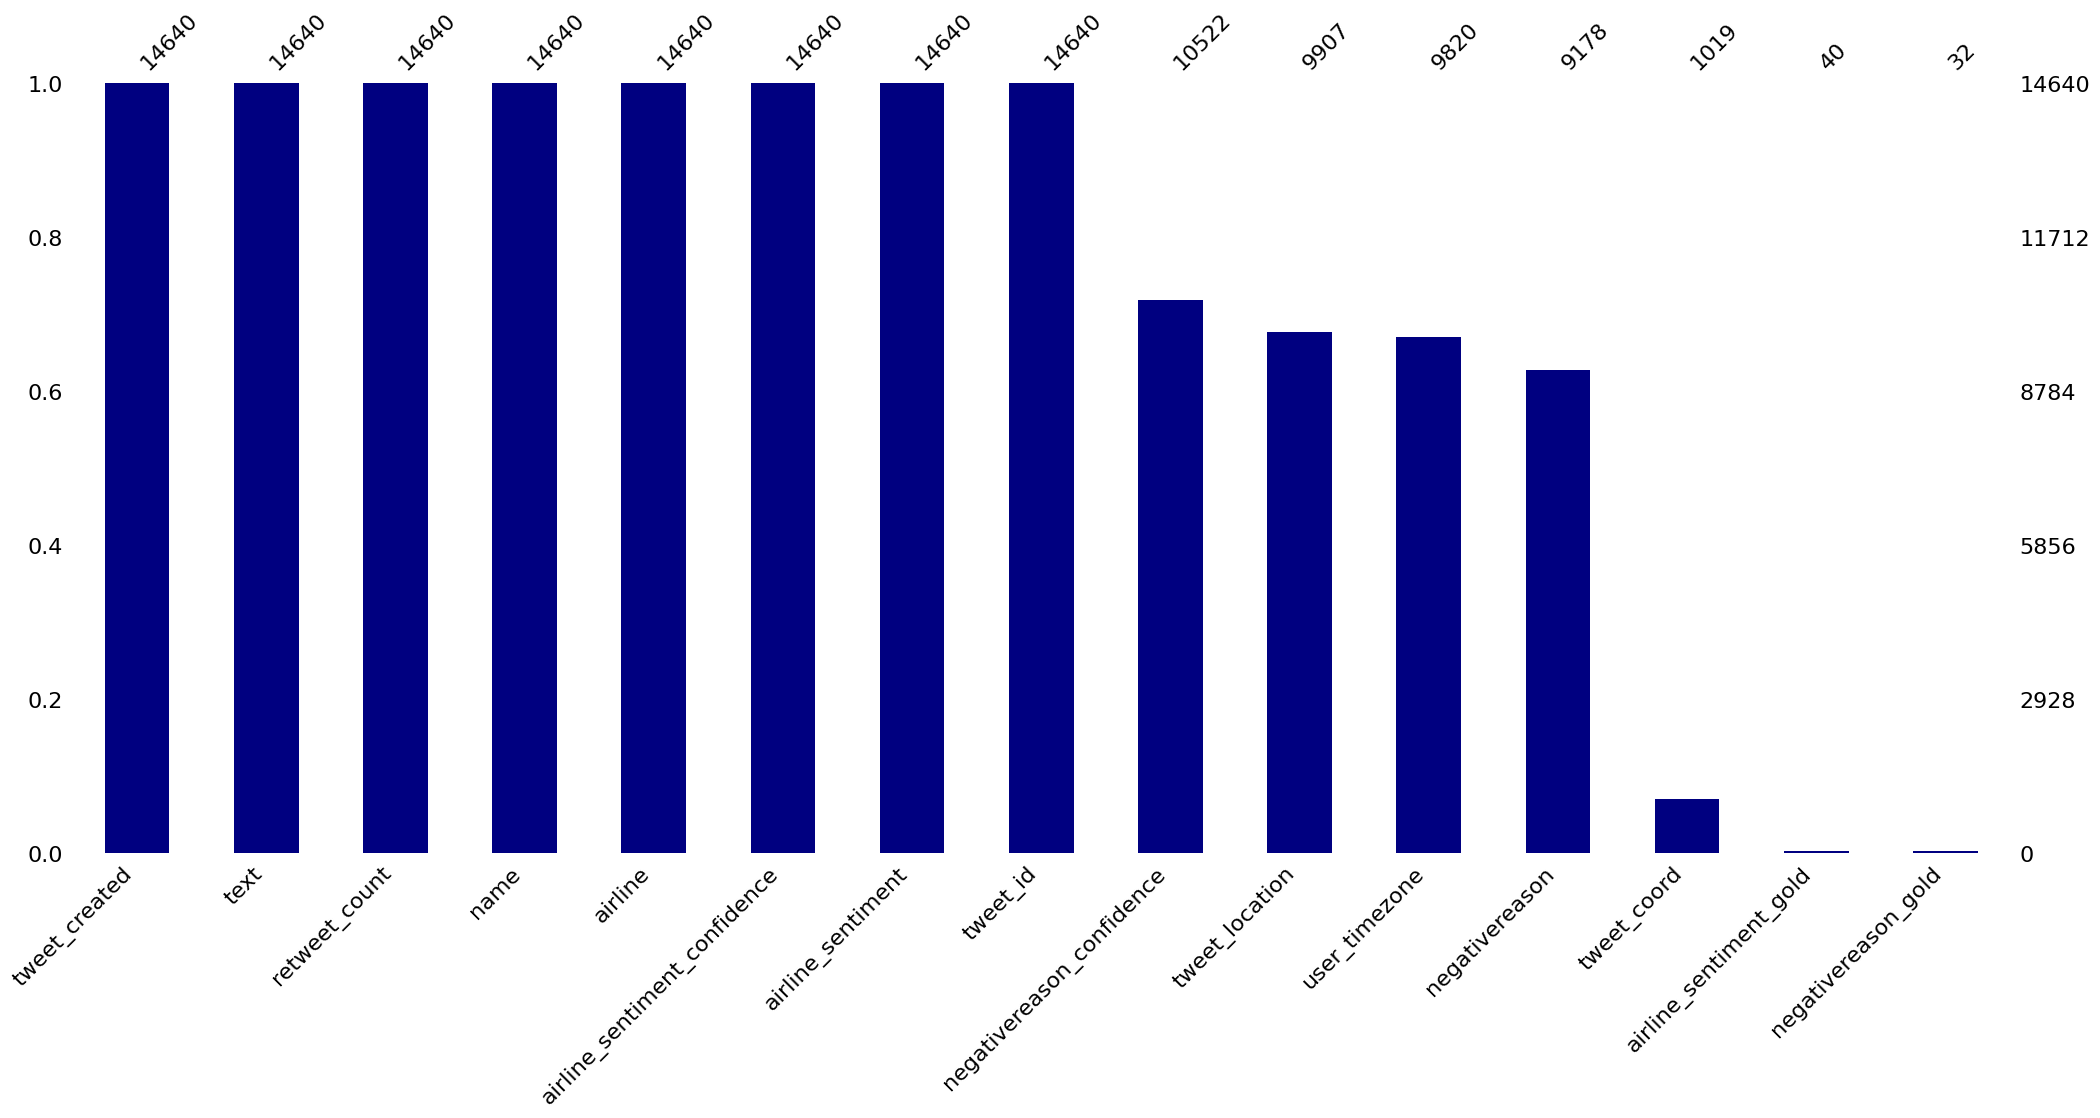

In [5]:
mns.bar(df,color='navy',sort='descending')

<Axes: xlabel='airline', ylabel='count'>

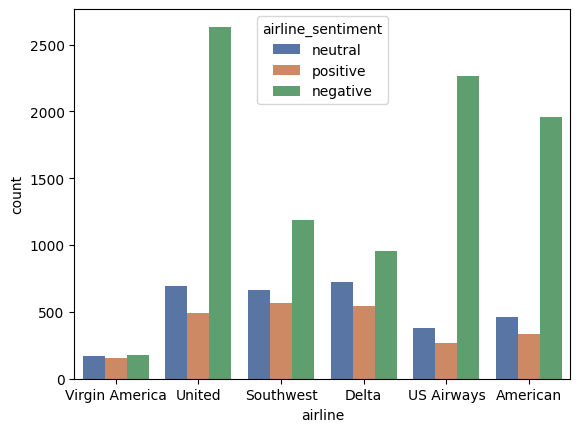

In [9]:
sns.countplot(df, x='airline', hue='airline_sentiment', palette ='deep')

In [12]:
fig = px.histogram(df, x = 'airline',color = 'negativereason', text_auto=True, barmode='group')
fig.show()

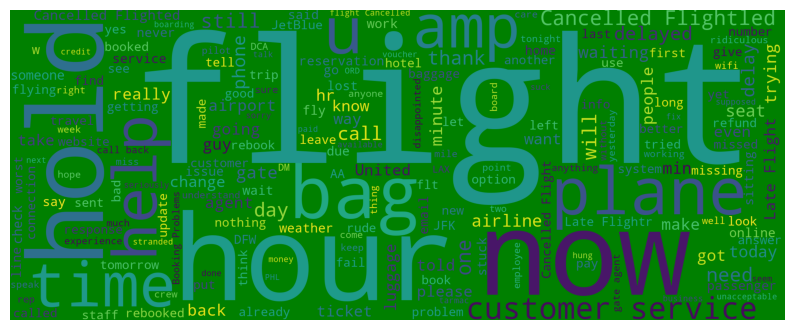

In [13]:
newdata = df[df['airline_sentiment'] == 'negative']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()


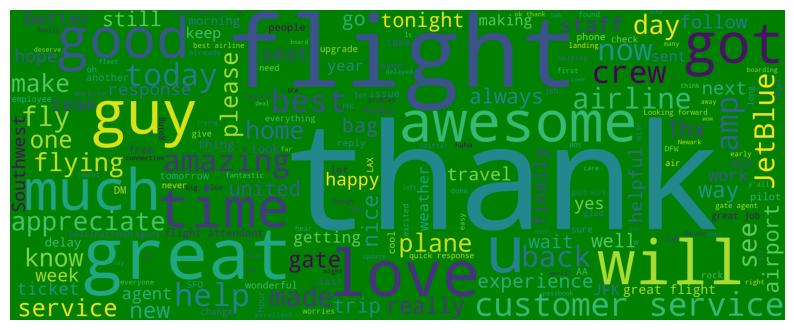

In [14]:
newdata = df[df['airline_sentiment'] == 'positive']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

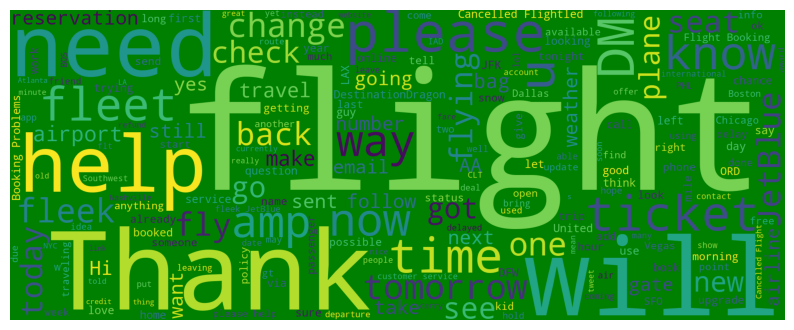

In [15]:
newdata = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [17]:
text_cleaning_re = "@\S+|http?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocessing(x, stem = False):
    x =re.sub(text_cleaning_re, ' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stopwords:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(token)
df.text = df.text.apply(lambda x: preprocessing(x))

In [18]:
df['text'].head()

0                  w h a t   d h e p b u r n   s a i d
1    p l u s   y o u   v e   a d d e d   c o m m e ...
2    i   d i d n   t   t o d a y   m u s t   m e a ...
3    i t   s   r e a l l y   a g g r e s s i v e   ...
4    a n d   i t   s   a   r e a l l y   b i g   b ...
Name: text, dtype: object